<a href="https://colab.research.google.com/github/AhmUmarCMS/AhmuCMS/blob/main/Relabelling_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Relabelling Original Dataset**

In [1]:
from scipy import stats
import pandas as pd
import numpy as np

In [3]:
#read diabetes data
data = pd.read_csv('diabetes.csv',encoding='latin1')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Data labelling!
#This is done to elimiate the inconsistencies in the original data. For example, a person is said to have diabetes but the glucose value is 0
#Define a new column 'Output' for reassining label to data based on medical standard. Glucose >125 is known as diabetes,
#Glucose 125 to 99 is prediabetes, while Glucose 99 <70 is for normal patients
# for all zero classes, do:
data['Output'] = data['Glucose'].apply(lambda x: 'diabetes' if x > 125 else 'prediabetes' if x > 99 and x <= 125 else 'normal' if x > 70 else 'diabetes')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Output
0,6,148,72,35,0,33.6,0.627,50,1,diabetes
1,1,85,66,29,0,26.6,0.351,31,0,normal
2,8,183,64,0,0,23.3,0.672,32,1,diabetes
3,1,89,66,23,94,28.1,0.167,21,0,normal
4,0,137,40,35,168,43.1,2.288,33,1,diabetes


In [5]:
#Code data to have numeric labels. The labels are normal=0, prediabetes=1, diabetes=2
data['Output'] = data['Output'].replace(['normal','prediabetes', 'diabetes'],[0,1,2])
#Delete original label
data= data.drop(['Outcome'], axis=1)
data = data.rename({'Output': 'Outcome'}, axis=1)
#save data
data.to_csv('diabetes2.csv',index=False, header=True)

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,2
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,2
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,2


##**Feature Selection**

In [22]:
from scipy import stats
import pandas as pd
import numpy as np

In [23]:
#read diabetes data
data = pd.read_csv('diabetes2.csv',encoding='latin1')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,2
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,2
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,2


In [24]:
#delete zero row entries (using this to avoid )
data= data[data['Glucose'] != 0]
data= data[data['BloodPressure'] != 0]
data= data[data['SkinThickness'] != 0]
data= data[data['Insulin'] != 0]
data= data[data['DiabetesPedigreeFunction'] != 0]
data= data[data['Age'] != 0]

#reset index
data.reset_index(drop=True, inplace=True)

#save non-zero entry data as
data.to_csv('diabetesNonzero.csv', index=False)

In [25]:
data = pd.read_csv('diabetesNonzero.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,2
2,3,78,50,32,88,31.0,0.248,26,0
3,2,197,70,45,543,30.5,0.158,53,2
4,1,189,60,23,846,30.1,0.398,59,2


In [26]:
rho, pval  = stats.spearmanr(data)

In [27]:
colno = len(data.columns)
print(colno)

9


In [28]:
df1 = pd.DataFrame(rho.reshape(-1, 9), columns=data.columns)
df2 = pd.DataFrame(pval.reshape(-1,9), columns=data.columns)
print (df2)

    Pregnancies        Glucose  BloodPressure  SkinThickness       Insulin  \
0  0.000000e+00   1.512343e-04   2.135696e-03   2.583580e-01  1.305371e-02   
1  1.512343e-04   0.000000e+00   2.077935e-06   1.577603e-05  2.855935e-50   
2  2.135696e-03   2.077935e-06   0.000000e+00   4.566778e-07  8.497382e-03   
3  2.583580e-01   1.577603e-05   4.566778e-07   0.000000e+00  1.177107e-06   
4  1.305371e-02   2.855935e-50   8.497382e-03   1.177107e-06  0.000000e+00   
5  2.447151e-01   7.373107e-05   9.317736e-11   1.731825e-53  9.140212e-10   
6  9.195581e-01   7.794421e-02   6.357441e-01   7.549431e-02  1.108721e-02   
7  7.146666e-46   1.000879e-12   1.659000e-11   1.023119e-06  1.287731e-07   
8  1.988624e-04  8.695074e-141   2.185037e-07   2.995704e-05  1.074357e-38   

            BMI  DiabetesPedigreeFunction           Age        Outcome  
0  2.447151e-01                  0.919558  7.146666e-46   1.988624e-04  
1  7.373107e-05                  0.077944  1.000879e-12  8.695074e-141  


In [29]:
### we can assign the index back to the column names for the total matrix:
df2=df2.set_index(data.columns)    #pvalue
#df1=df1.set_index(data1.columns)

In [30]:
import math
pv = []
ind = []
for index, val in df2.iterrows():
    m = (val[8])*10000
    alpha = 0.01
    if m <= alpha:
        pv.append(m)
        ind.append(index)
        print(pv,ind)
pv = pv[:-1]
ind = ind[:-1]

[8.695073891778219e-137] ['Glucose']
[8.695073891778219e-137, 0.0021850372598786923] ['Glucose', 'BloodPressure']
[8.695073891778219e-137, 0.0021850372598786923, 1.0743570349726535e-34] ['Glucose', 'BloodPressure', 'Insulin']
[8.695073891778219e-137, 0.0021850372598786923, 1.0743570349726535e-34, 2.750307561581837e-06] ['Glucose', 'BloodPressure', 'Insulin', 'Age']
[8.695073891778219e-137, 0.0021850372598786923, 1.0743570349726535e-34, 2.750307561581837e-06, 0.0] ['Glucose', 'BloodPressure', 'Insulin', 'Age', 'Outcome']


In [21]:
# Selected Features
print(pv,ind)

[8.695073891778219e-137, 0.0021850372598786923, 1.0743570349726535e-34, 2.750307561581837e-06] ['Glucose', 'BloodPressure', 'Insulin', 'Age']


##**Visualization**

In [31]:
import math
pv = []
ind = []
for index, val in df2.iterrows():
    m = (val[8])
    pv.append(abs(np.log(m)))
    ind.append(index)
pv = pv[:-1]
ind = ind[:-1]
pv = [math.floor(float(x)) for x in pv]

<ipython-input-31-af9c3e844351>:6: RuntimeWarning: divide by zero encountered in log
  pv.append(abs(np.log(m)))


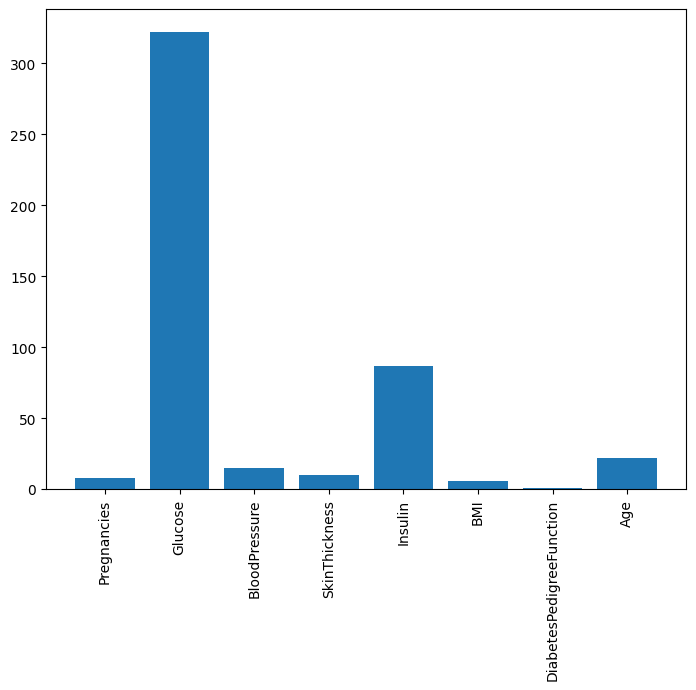

In [32]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind,pv)
plt.xticks(ind, rotation=90)
plt.show()

In [33]:
# Save selected features Nonzero data
data = data[['Glucose','BloodPressure','Insulin','Age','Outcome']]
data.head()

,Glucose,BloodPressure,Insulin,Age,Outcome
0,89,66,94,21,0
1,137,40,168,33,2
2,78,50,88,26,0
3,197,70,543,53,2
4,189,60,846,59,2


In [34]:
len(data.index)

393

In [35]:
data.isin([0]).sum()

Glucose           0
BloodPressure     0
Insulin           0
Age               0
Outcome          98
dtype: int64

In [36]:
data.to_csv('selfeatures-nonzero.csv', index=False)

##**Preparing Polynomial Data**

In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv,sklearn

from subprocess import check_output

In [38]:
data = pd.read_csv('diabetes2.csv',encoding='latin1')
data = data[data['Glucose'] != 0]
data = data[data['Insulin'] != 0]
data = data[data['BloodPressure'] != 0]
data = data[data['Age'] != 0]

In [41]:
#Create Train data for training the Polynomial Regression

#delete zero row entries (using this to avoid )
train = data[['Glucose','Insulin']]
train.reset_index(drop=True, inplace=True)
train.head()

,Glucose,Insulin
0,89,94
1,137,168
2,78,88
3,197,543
4,189,846


In [42]:
#Create Test Data for predictiong missing values
data = pd.read_csv('diabetes2.csv',encoding='latin1')
data = data[data['Glucose'] != 0]
data = data[data['Insulin'] == 0]
data = data[data['BloodPressure'] != 0]
data = data[data['Age'] != 0]

pred = data[['Glucose','Insulin']]
pred.reset_index(drop=True, inplace=True)
pred.head()

,Glucose,Insulin
0,148,0
1,85,0
2,183,0
3,116,0
4,125,0


In [43]:
#save train data
train.to_csv('poly-Nonzero.csv',index=False, header=True)

#save pred data
pred.to_csv('poly-pred.csv',index=False, header=True)

##**PolynomialRegression**

In [107]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [108]:
#glucose and output data
data = pd.read_csv('poly-Nonzero.csv')
data = data.sort_values(by='Insulin', ascending=True)
print(data.shape)
data.head()

(393, 2)


,Glucose,Insulin
226,180,14
319,68,15
390,88,16
293,99,18
48,83,18


In [109]:
from sklearn.model_selection import train_test_split
splitRatio = 0.2

train , test = train_test_split(data,test_size = splitRatio,random_state = 123)

X_train = train[[x for x in train.columns if x not in ["Insulin"]]]
y_train = train[["Insulin"]]
#y_train = label_binarize(y_train, classes=[0,1,2])

X_test  = test[[x for x in test.columns if x not in ["Insulin"]]]
y_test  = test[["Insulin"]]

In [110]:
y_train = y_train.to_numpy()
X_train = X_train.to_numpy()
y_test = y_test.to_numpy()
X_test = X_test.to_numpy()

In [111]:
polynomial_features2= PolynomialFeatures(degree=2)
polynomial_features7= PolynomialFeatures(degree=7)
polynomial_features12= PolynomialFeatures(degree=12)
polynomial_features17= PolynomialFeatures(degree=17)

In [112]:
x_poly2 = polynomial_features2.fit_transform(X_train)
t_poly2 = polynomial_features2.fit_transform(X_test)
model = LinearRegression()
model.fit(t_poly2, y_test)
y_poly_pred2 = model.predict(t_poly2)



x_poly7 = polynomial_features7.fit_transform(X_train)
t_poly7 = polynomial_features7.fit_transform(X_test)
model = LinearRegression()
model.fit(t_poly7, y_test)
y_poly_pred7 = model.predict(t_poly7)




x_poly12 = polynomial_features12.fit_transform(X_train)
t_poly12 = polynomial_features12.fit_transform(X_test)
model = LinearRegression()
model.fit(t_poly12, y_test)
y_poly_pred12 = model.predict(t_poly12)

x_poly17 = polynomial_features17.fit_transform(X_train)
t_poly17 = polynomial_features17.fit_transform(X_test)
model = LinearRegression()
model.fit(t_poly17, y_test)
y_poly_pred17 = model.predict(t_poly17)

In [113]:
mse = mean_squared_error(y_test,y_poly_pred2)
print(mse)

6873.914807633459


In [114]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_poly_pred2)

56.02684694954639

82.90907554443879
0.43911224526388404


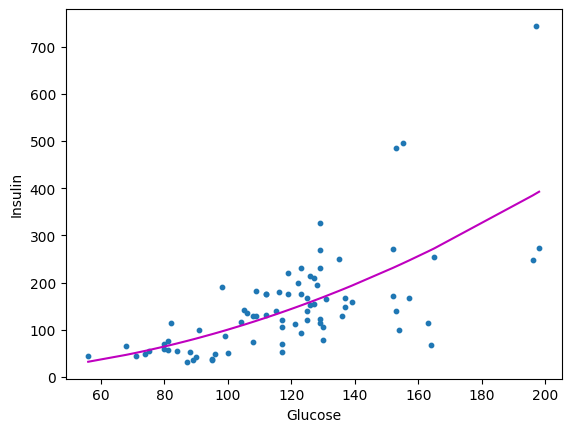

In [115]:
rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred2))
r2 = r2_score(y_test,y_poly_pred2)
print(rmse)
print(r2)

plt.scatter(X_test, y_test, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test,y_poly_pred2), key=sort_axis)
X_test, y_poly_pred2 = zip(*sorted_zip)
plt.plot(X_test, y_poly_pred2, color='m')
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()

In [116]:
"""

#fig, axes = plt.subplots(2,2)
# plot the 3 sets

plt.scatter(X_test, y_test, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip2 = sorted(zip(X_test,y_poly_pred2), key=sort_axis)
sorted_zip7 = sorted(zip(X_test,y_poly_pred7), key=sort_axis)
sorted_zip12 = sorted(zip(X_test,y_poly_pred12), key=sort_axis)
sorted_zip17 = sorted(zip(X_test,y_poly_pred17), key=sort_axis)
#sorted_zip18 = sorted(zip(X_test,y_poly_pred18), key=sort_axis)

X_test, y_poly_pred17 = zip(*sorted_zip7)

plt.plot(X_test, y_poly_pred17,label='7-degree')

plt.xlabel("Glucose")
plt.ylabel("Insulin")

plt.legend()

plt.show()

"""

'\n\n#fig, axes = plt.subplots(2,2)\n# plot the 3 sets\n\nplt.scatter(X_test, y_test, s=10)\n# sort the values of x before line plot\nsort_axis = operator.itemgetter(0)\nsorted_zip2 = sorted(zip(X_test,y_poly_pred2), key=sort_axis)\nsorted_zip7 = sorted(zip(X_test,y_poly_pred7), key=sort_axis)\nsorted_zip12 = sorted(zip(X_test,y_poly_pred12), key=sort_axis)\nsorted_zip17 = sorted(zip(X_test,y_poly_pred17), key=sort_axis)\n#sorted_zip18 = sorted(zip(X_test,y_poly_pred18), key=sort_axis)\n\nX_test, y_poly_pred17 = zip(*sorted_zip7)\n\nplt.plot(X_test, y_poly_pred17,label=\'7-degree\')\n\nplt.xlabel("Glucose")\nplt.ylabel("Insulin")\n\nplt.legend()\n\nplt.show()\n\n'

In [117]:
"""
fig, axes = plt.subplots(2,2)
# plot the 3 sets
plt.plot(X_test, y_poly_pred2,label='2-degree')
plt.plot(X_test, y_poly_pred7,label='7-degree')
plt.plot(X_test, y_poly_pred12,label='12-degree')
plt.plot(X_test, y_poly_pred17,label='17-degree')


# one plot on each subplot
axes[0][0].scatter(x,y1)
axes[0][1].bar(x,y1)
axes[1][0].scatter(x,y2)
axes[1][1].plot(x,y2)

# you can set a legend for a single subplot
axes[1][1].legend(['plot 4'])
# call with no parameters
plt.legend()

plt.show()
"""

"\nfig, axes = plt.subplots(2,2)\n# plot the 3 sets\nplt.plot(X_test, y_poly_pred2,label='2-degree')\nplt.plot(X_test, y_poly_pred7,label='7-degree')\nplt.plot(X_test, y_poly_pred12,label='12-degree')\nplt.plot(X_test, y_poly_pred17,label='17-degree')\n\n\n# one plot on each subplot\naxes[0][0].scatter(x,y1)\naxes[0][1].bar(x,y1)\naxes[1][0].scatter(x,y2)\naxes[1][1].plot(x,y2)\n\n# you can set a legend for a single subplot\naxes[1][1].legend(['plot 4'])\n# call with no parameters\nplt.legend()\n\nplt.show()\n"

In [122]:
#new_df = pd.DataFrame([[141,44]])
new_df = pd.read_csv('poly-pred.csv',encoding='latin1')
new_df  = new_df[["Glucose"]]
new_df.head()

,Glucose
0,148
1,85
2,183
3,116
4,125


In [123]:
new_d = new_df.to_numpy()
newdf_poly = polynomial_features7.fit_transform(new_d)

In [124]:
# We predict the outcome
prediction = model.predict(newdf_poly)
prediction = prediction.astype(int)

ValueError: X has 8 features, but LinearRegression is expecting 18 features as input.

In [125]:
new_df['Insulin'] = prediction
new_df.head()

,Glucose,Insulin
0,148,None
1,85,None
2,183,None
3,116,None
4,125,None


In [106]:
new_df.to_csv('pred-insulin-7.csv',index=False, header=True)

##**Prepare Data for Prediction**

In [126]:
import pandas as pd
import numpy as np

In [127]:
# Read nonzero of selected feature data
df_S = pd.read_csv('diabetes2.csv',encoding='latin1')
df_S = df_S.rename(columns={'Output': 'Outcome'})
df_S = df_S[df_S['Glucose'] != 0]
df_S = df_S[df_S['Insulin'] != 0]
df_S = df_S[df_S['BloodPressure'] != 0]
df_S = df_S[df_S['Age'] != 0]
df_S = df_S[['Glucose','BloodPressure','Insulin','Age','Outcome']]
df_S.reset_index(drop=True, inplace=True)
len(df_S.index)

393

In [128]:
#Retain Zero Insulin dat
df_D = pd.read_csv('diabetes2.csv',encoding='latin1')
df_D = df_D.rename(columns={'Output': 'Outcome'})
df_D = df_D[df_D['Glucose'] != 0]
df_D = df_D[df_D['Insulin'] == 0]
df_D = df_D[df_D['BloodPressure'] != 0]
df_D = df_D[df_D['Age'] != 0]
df_D = df_D[['Glucose','BloodPressure','Insulin','Age','Outcome']]
df_D.reset_index(drop=True, inplace=True)
len(df_D.index)

335

In [129]:
df_P = pd.read_csv('pred-insulin-7.csv')
len(df_P.index)

335

In [130]:
# Replace column Insulin with predicted
df_D['Insulin'] = df_P['Insulin']

In [131]:
#concatenate predicted insulin values with diabetestest2 data (which is only Glucose and Output)
merge = pd.concat([df_S, df_D])
merge.head()

,Glucose,BloodPressure,Insulin,Age,Outcome
0,89,66,94.0,21,0
1,137,40,168.0,33,2
2,78,50,88.0,26,0
3,197,70,543.0,53,2
4,189,60,846.0,59,2


In [132]:
len(merge.index)

728

In [133]:
merge.isin([0]).sum()

Glucose            0
BloodPressure      0
Insulin            0
Age                0
Outcome          170
dtype: int64

In [134]:
#save final merged data
#convert DataFrame to csv file. NB: index is automatically generated by Pandas while converting to CSV file. So, use index=False to stop it
merge.to_csv('diabetesmerge.csv', index=False)

##**RandomForestPrediction**

In [135]:
#Declare Variables
import numpy as np
import csv,sklearn
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from numpy import std
from numpy import mean
from pandas import read_csv
from sklearn import metrics
from matplotlib import pyplot
from collections import Counter
import matplotlib.pyplot as plt #for visualization and plot
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold

In [137]:
#glucose and output data
data = pd.read_csv('diabetesmerge.csv')
data.head()

,Glucose,BloodPressure,Insulin,Age,Outcome
0,89,66,94.0,21,0
1,137,40,168.0,33,2
2,78,50,88.0,26,0
3,197,70,543.0,53,2
4,189,60,846.0,59,2


In [138]:
# Split data into train and test set
splitRatio = 0.2

train , test = train_test_split(data,test_size = splitRatio,shuffle=True,random_state = 1)

X_train = train[[x for x in train.columns if x not in ["Outcome"]]]
y_train = train[["Outcome"]]

X_test  = test[[x for x in test.columns if x not in ["Outcome"]]]
y_test  = test[["Outcome"]]

Class=0, n=37 (25.342%)
Class=2, n=55 (37.671%)
Class=1, n=54 (36.986%)


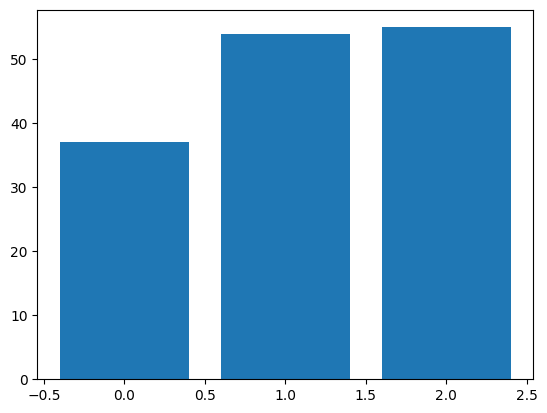

In [139]:
#Visualizing Class Distribution
# summarize
out = y_test['Outcome']
counter = Counter(out)
for k,v in counter.items():
	per = v / len(out) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [142]:
# define the model parameters
modelRF = RandomForestClassifier(max_depth= 2, max_features=3, n_estimators=50)
modelRF = RandomForestClassifier(max_depth= 3, max_features=2, n_estimators=50,min_samples_split=3, min_samples_leaf=4)

# handle missing values in X_train
X_train = X_train.fillna(X_train.mean())

# fit the model
modelRF.fit(X_train, y_train)

<ipython-input-142-ac1fecdc36e1>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRF.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, max_features=2, min_samples_leaf=4,
                       min_samples_split=3, n_estimators=50)

In [143]:
# Grid Search for optimizing random forest parameters

param_grid = [
    { 'max_features': [2, 3, 4],'max_depth': [2, 3, 5,6,7,8,9,10],'n_estimators': [10, 50, 100,200,500, 1000]}]

modelRF_grid = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(modelRF_grid, param_grid,
                           scoring='accuracy',
                           return_train_score=True,
                           cv=cv,
                          )
grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [2, 3, 5, 6, 7, 8, 9, 10],
                          'max_features': [2, 3, 4],
                          'n_estimators': [10, 50, 100, 200, 500, 1000]}],
             return_train_score=True, scoring='accuracy')

In [144]:
grid_search.best_params_

{'max_depth': 3, 'max_features': 4, 'n_estimators': 10}

In [145]:
cv_scores = grid_search.cv_results_

In [146]:
##printing all the parameters along with their scores
for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores["params"]):
    print(mean_score, params)

0.9187706993960647 {'max_depth': 2, 'max_features': 2, 'n_estimators': 10}
0.931385154880187 {'max_depth': 2, 'max_features': 2, 'n_estimators': 50}
0.9243814533411262 {'max_depth': 2, 'max_features': 2, 'n_estimators': 100}
0.9392752776154296 {'max_depth': 2, 'max_features': 2, 'n_estimators': 200}
0.9409507110851353 {'max_depth': 2, 'max_features': 2, 'n_estimators': 500}
0.9392655367231638 {'max_depth': 2, 'max_features': 2, 'n_estimators': 1000}
0.9810831872199494 {'max_depth': 2, 'max_features': 3, 'n_estimators': 10}
0.9810831872199494 {'max_depth': 2, 'max_features': 3, 'n_estimators': 50}
0.9810831872199494 {'max_depth': 2, 'max_features': 3, 'n_estimators': 100}
0.9810831872199494 {'max_depth': 2, 'max_features': 3, 'n_estimators': 200}
0.9810831872199494 {'max_depth': 2, 'max_features': 3, 'n_estimators': 500}
0.9810831872199494 {'max_depth': 2, 'max_features': 3, 'n_estimators': 1000}
0.9810831872199494 {'max_depth': 2, 'max_features': 4, 'n_estimators': 10}
0.98108318721994

In [148]:
#y_pred_class = grid_search.predict(X_test)
X_test = X_test.fillna(X_test.mean())
y_pred_class = modelRF.predict(X_test)

In [149]:
# calculate accuracy
print(metrics.accuracy_score(y_test, y_pred_class, normalize=True))

1.0


In [150]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)

[[37  0  0]
 [ 0 54  0]
 [ 0  0 55]]


In [151]:
# Compare Prediction
print("Train acc: " , modelRF.score(X_train, y_train))
print("Test acc: ", modelRF.score(X_test, y_test))

Train acc:  0.9810996563573883
Test acc:  1.0


In [152]:
# Compare Prediction
print("Train acc: " , grid_search.score(X_train, y_train))
print("Test acc: ", grid_search.score(X_test, y_test))

Train acc:  1.0
Test acc:  1.0


In [153]:
new_df = pd.DataFrame([[100,300,75,64]])
# We predict insulin
prediction = grid_search.predict(new_df)
print(prediction)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [154]:
# Prediction
prediction = np.around(modelRF.predict(X_test))
print(metrics.classification_report(y_test,prediction, digits=8))

              precision    recall  f1-score   support

           0  1.00000000 1.00000000 1.00000000        37
           1  1.00000000 1.00000000 1.00000000        54
           2  1.00000000 1.00000000 1.00000000        55

    accuracy                      1.00000000       146
   macro avg  1.00000000 1.00000000 1.00000000       146
weighted avg  1.00000000 1.00000000 1.00000000       146

